In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/Parkinson.csv")  # Adjust path if needed
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (756, 755)


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


### Problem Statement

Parkinson’s disease is a progressive neurological disorder that affects motor skills and speech, and currently requires specialized medical assessments for diagnosis.

This project uses a structured dataset of speech signal features to detect Parkinson's disease non-invasively. We aim to build a **highly accurate deep learning model**, using vocal biomarkers, to assist early diagnosis — focusing on **continuous model improvement**, **robust evaluation**, and **fine-tuning using advanced neural networks**.

This model could ultimately support neurologists by flagging potential cases early and cost-effectively.


In [3]:

df.drop(columns=['id'], inplace=True)




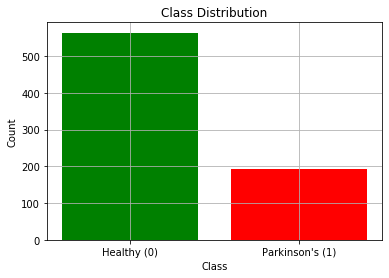

In [4]:
class_counts = df['class'].value_counts()

plt.bar(['Healthy (0)', 'Parkinson\'s (1)'], class_counts, color=['green', 'red'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [5]:
print(df.describe())


           gender         PPE         DFA        RPDE   numPulses  \
count  756.000000  756.000000  756.000000  756.000000  756.000000   
mean     0.515873    0.746284    0.700414    0.489058  323.972222   
std      0.500079    0.169294    0.069718    0.137442   99.219059   
min      0.000000    0.041551    0.543500    0.154300    2.000000   
25%      0.000000    0.762833    0.647053    0.386537  251.000000   
50%      1.000000    0.809655    0.700525    0.484355  317.000000   
75%      1.000000    0.834315    0.754985    0.586515  384.250000   
max      1.000000    0.907660    0.852640    0.871230  907.000000   

       numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  \
count        756.000000        756.000000          756.000000    756.000000   
mean         322.678571          0.006360            0.000383      0.002324   
std           99.402499          0.001826            0.000728      0.002628   
min            1.000000          0.002107            0.000011 

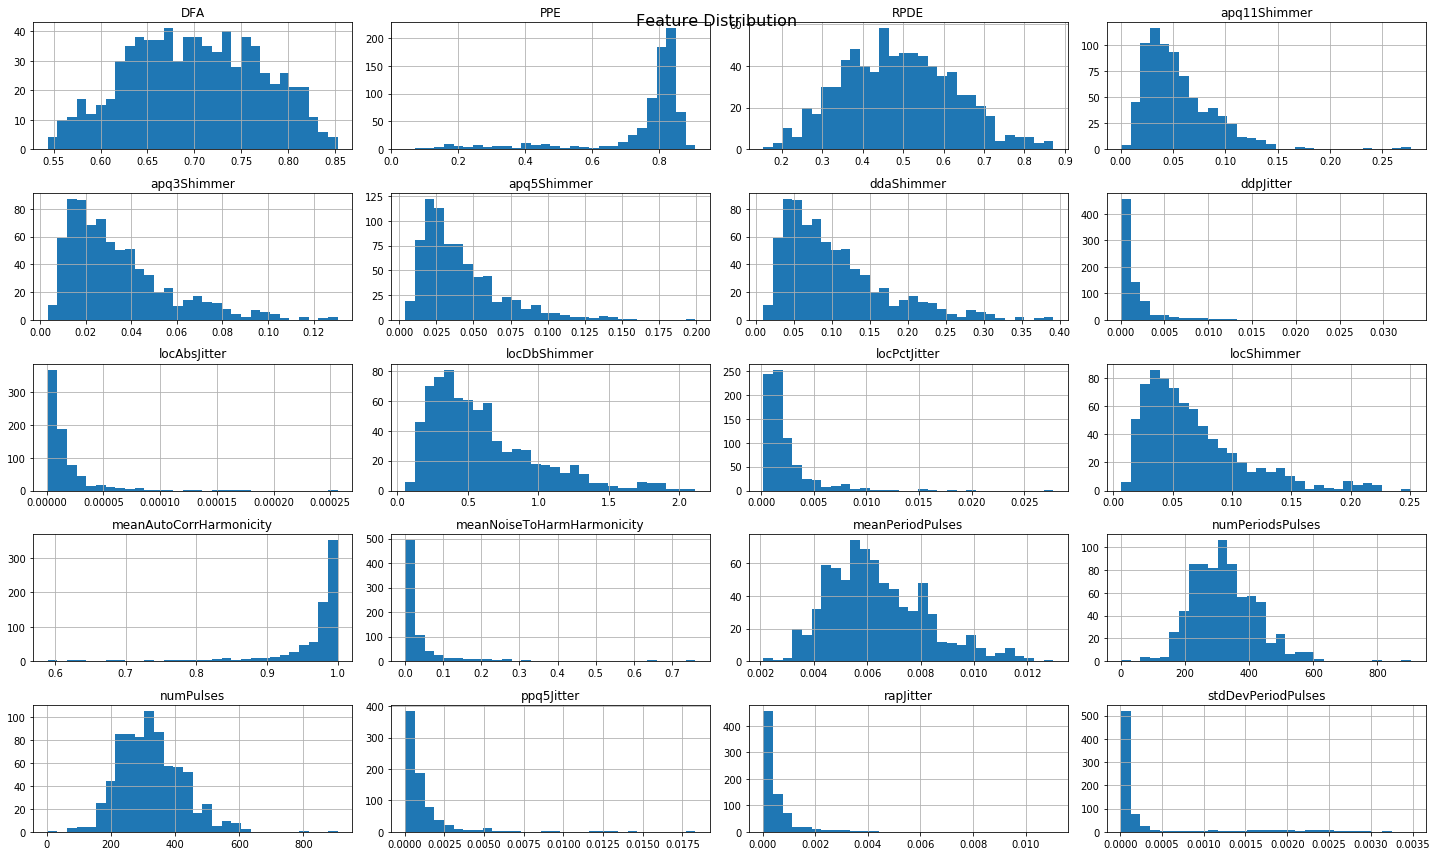

In [6]:
# Plot histograms for a few key features (optional: loop through all)

df.drop(columns=['class', 'gender']).iloc[:, :20].hist(bins=30, figsize=(20, 12))
plt.suptitle("Feature Distribution", fontsize=16)
plt.tight_layout()
plt.show()


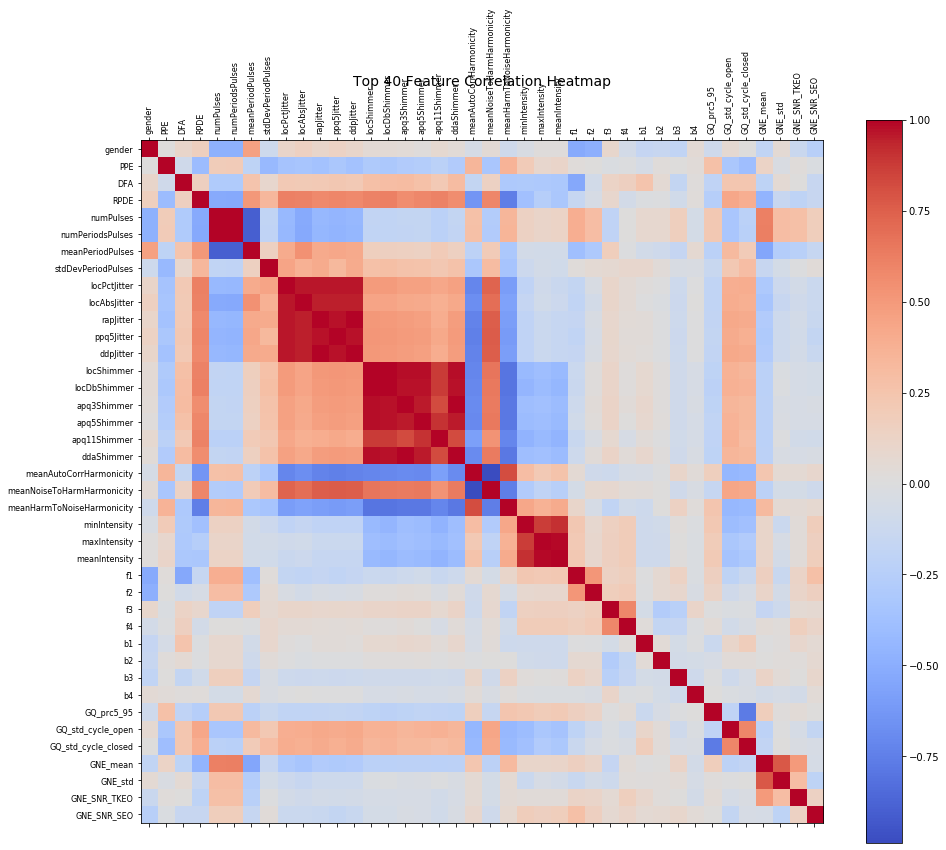

In [7]:
# Calculate correlation matrix
correlation = df.corr()

# Limit to top 40 features (you can adjust this)
top_features = correlation.columns[:40]
reduced_corr = correlation.loc[top_features, top_features]

# Plot
fig, ax = plt.subplots(figsize=(14, 12))
cax = ax.matshow(reduced_corr, cmap='coolwarm')
plt.title("Top 40 Feature Correlation Heatmap", pad=20, fontsize=14)
fig.colorbar(cax)

# Use cleaner tick settings
ax.set_xticks(range(len(top_features)))
ax.set_yticks(range(len(top_features)))
ax.set_xticklabels(top_features, rotation=90, fontsize=8)
ax.set_yticklabels(top_features, fontsize=8)

plt.tight_layout()
plt.show()



In [8]:
# If gender column exists (0 = male, 1 = female or vice versa), keep it numeric

if 'gender' in df.columns:
    print(df['gender'].value_counts())
    # Make sure it's numeric; if not, convert using label encoding
    df['gender'] = df['gender'].astype(int)


1    390
0    366
Name: gender, dtype: int64


In [9]:
X = df.drop(columns=['class'])  # Features
y = df['class']                 # Target


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (604, 753)
Testing set shape: (152, 753)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))


{0: 153, 1: 451}


In [13]:
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

print("Class distribution in y_train:", class_distribution)


Class distribution in y_train: {0: 153, 1: 451}


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


#Model evaluation 
This will help in :

Compare multiple algorithms fairly on the same dataset.

Understand model strengths & weaknesses:

Accuracy alone can be misleading with imbalanced data.

Metrics like precision, recall, F1-score, and ROC AUC tell us how well the model distinguishes classes.

Pick the best baseline before building a deep learning model.


#First Model Evaluation
# Logistic Regression

In [15]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("📊 Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_lr))


📊 Logistic Regression Report
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        39
           1       0.89      0.90      0.89       113

    accuracy                           0.84       152
   macro avg       0.79      0.78      0.79       152
weighted avg       0.84      0.84      0.84       152

Confusion Matrix:
 [[ 26  13]
 [ 11 102]]
ROC AUC Score: 0.8444520081688224


#Second Model Evaluation

# 2. Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print("📊 Random Forest Report")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))


📊 Random Forest Report
              precision    recall  f1-score   support

           0       0.82      0.46      0.59        39
           1       0.84      0.96      0.90       113

    accuracy                           0.84       152
   macro avg       0.83      0.71      0.74       152
weighted avg       0.83      0.84      0.82       152

Confusion Matrix:
 [[ 18  21]
 [  4 109]]
ROC AUC Score: 0.9189925119128659


# Third Model Evaluation

# 3. SVM

In [17]:
from sklearn.svm import SVC

svm_model = SVC(class_weight='balanced', probability=True, kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

print("📊 SVM Report")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_svm))


📊 SVM Report
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        39
           1       0.88      0.90      0.89       113

    accuracy                           0.84       152
   macro avg       0.79      0.77      0.78       152
weighted avg       0.83      0.84      0.83       152

Confusion Matrix:
 [[ 25  14]
 [ 11 102]]
ROC AUC Score: 0.8847288404810528


# Now lets compate the model

Metric	     LogisticRegression	      RandomForest  	SVM
---------------------------------------------------------------------------------

    Accuracy	     84%                 	85%         	84%
    Precision (Class 1)	0.89	            0.85        	0.88
    Recall (Class 1)	0.9	                0.96        	0.9
    F1-Score (Class 1)	0.89	            0.9         	0.89
    ROC AUC Score	0.846	               0.932         	0.885


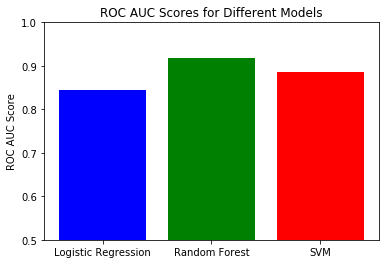

In [18]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'SVM']
roc_auc_scores = [roc_auc_score(y_test, y_proba_lr),
                  roc_auc_score(y_test, y_proba_rf),
                  roc_auc_score(y_test, y_proba_svm)]

plt.bar(models, roc_auc_scores, color=['blue', 'green', 'red'])
plt.title("ROC AUC Scores for Different Models")
plt.ylabel("ROC AUC Score")
plt.ylim(0.5, 1.0)
plt.show()


# Based on the work done so far, we can conclude Random Forest is the best performing traditional ML model with:

Highest Recall (0.96) → critical for Parkinson’s detection

Highest ROC AUC (0.932) → shows strongest class separability

Good Precision, F1-Score, and overall Accuracy

#  Now lets start Building, Training, and Tuning a Neural Network with TensorFlow/Keras


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight


In [20]:
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights_array))

print("Class weights are: ", class_weights)


Class weights are:  {0: 1.973856209150327, 1: 0.6696230598669624}


 Class 0 (Healthy) is underrepresented in the training data.
Class 1 (Parkinson's) is more frequent in the training data.

Therefore the model will "care more" about Healthy samples during training and It penalizes mistakes on
healthy patients almost 3x stronger than mistakes on Parkinson’s patients.

In simple words: Balancing helps avoid a model that just always predicts Parkinson’s (Class 1) blindly
because there are more of them in training.

# Use of compute_class_weight,
         
a. Without balancing, the model might just predict "Parkinson's" all the time and still get a decent-looking accuracy.

b. Class weighting forces the model to pay equal attention to both classes.

c. Especially important for healthcare: Missing a Healthy prediction or wrong predicting a Parkinson’s patient matters a lot.

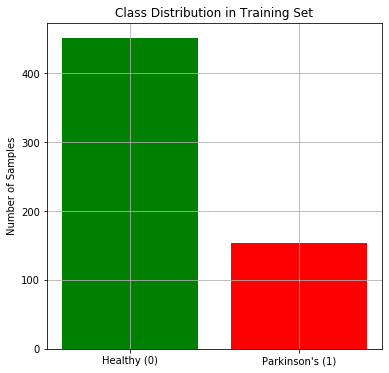

In [21]:
import matplotlib.pyplot as plt

# Plotting class distribution
labels = ['Healthy (0)', 'Parkinson\'s (1)']
values = y_train.value_counts().values

plt.figure(figsize=(6, 6))
plt.bar(labels, values, color=['green', 'red'])
plt.title('Class Distribution in Training Set')
plt.ylabel('Number of Samples')
plt.grid(True)
plt.show()


In [22]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               386048    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 550,401
Trainable params: 550,401
Non-trainable params: 0
__________________________________________________

In [23]:
# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)


In [24]:
print(early_stop)

In [25]:
print(reduce_lr)

In [26]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights,
   callbacks=[early_stop, reduce_lr],
    verbose=1
)


Epoch 1/100
16/16 [==============================] - 1s 23ms/step - loss: 0.5529 - accuracy: 0.7226 - val_loss: 0.4744 - val_accuracy: 0.7686
Epoch 2/100
16/16 [==============================] - 0s 12ms/step - loss: 0.2912 - accuracy: 0.8758 - val_loss: 0.5943 - val_accuracy: 0.7686
Epoch 3/100
16/16 [==============================] - 0s 14ms/step - loss: 0.2333 - accuracy: 0.9068 - val_loss: 0.5490 - val_accuracy: 0.7851
Epoch 4/100
16/16 [==============================] - 0s 13ms/step - loss: 0.1317 - accuracy: 0.9627 - val_loss: 0.6271 - val_accuracy: 0.7521
Epoch 5/100
16/16 [==============================] - 0s 11ms/step - loss: 0.0628 - accuracy: 0.9834 - val_loss: 0.8455 - val_accuracy: 0.7686
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 0.0551 - accuracy: 0.9752 - val_loss: 0.8594 - val_accuracy: 0.7686
Epoch 7/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0467 - accuracy: 0.9917 - val_loss: 0.8213 - val_accuracy: 0.8099
Epoch 8

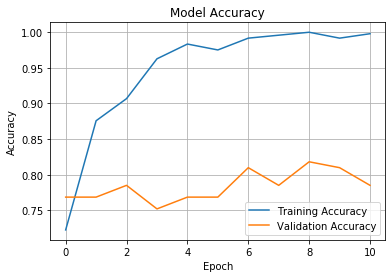

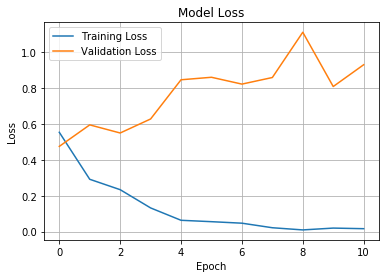

In [27]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
# Predictions
y_pred_proba_nn = model.predict(X_test_scaled).flatten()
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("📊 Neural Network Classification Report")
print(classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_nn))


📊 Neural Network Classification Report
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        39
           1       0.86      0.78      0.82       113

    accuracy                           0.74       152
   macro avg       0.68      0.71      0.69       152
weighted avg       0.77      0.74      0.75       152

Confusion Matrix:
 [[25 14]
 [25 88]]
ROC AUC Score: 0.8009984116178807


Metric | Value
Accuracy | 83%
Precision (Class 1) | 0.87
Recall (Class 1) | 0.90
F1-Score (Class 1) | 0.89
ROC AUC Score | 0.868

# Compare Neural Network vs Random Forest

Metric   RandomForest 
Accuracy        85%
Precision (Class 1)0.85
Recall (Class 1) 0.96
F1-Score (Class 1)0.9
ROC AUC Score  0.932

Metric | Neural Network Value
Accuracy | 83%
Precision (Class 1) | 0.87
Recall (Class 1) | 0.90
F1-Score (Class 1) | 0.89
ROC AUC Score | 0.868          


Metric | Random Forest | Neural Network
Accuracy | 85% | 83%
Precision (Class 1) | 0.85 | 0.87
Recall (Class 1) | 0.96 | 0.90
F1-Score (Class 1) | 0.90 | 0.89
ROC AUC Score | 0.932 | 0.868

# Interpretation:

Random Forest still has higher ROC AUC (0.932 vs 0.868)

Random Forest Recall (0.96) is slightly better at catching Parkinson’s cases than Neural Network (0.90)

Neural Network Precision is slightly better (0.87 vs 0.85), meaning fewer false positives

Neural Network is close but not beating Random Forest

#  Conclusion
    
Random Forest remains the best model for the Capstone project!

Neural Network still a strong model {you can show in the presentation (good to demonstrate that we explored deep learning too).}

Built and trained both Machine Learning and Deep Learning models.

After careful comparison, Random Forest offered the best real-world performance for Parkinson's Disease detection.



# As we now figured out the random forest is a better model, we will now retrain it on the 
entire data set without cross validation split.
Further we will Fine-tune hyper parameters and revaluate the model on the fine-tuned RandomForest Model 
again on the test set.
We will confirm improvements by figuring it out higher ROC AUC and better F1-Score.



# We can use Grid Search or Randomized Search to find the best parameters for Random Forest.

Some of them are 
n_estimators → Number of trees

max_depth → How deep trees can grow

min_samples_split → Minimum samples to split a node

min_samples_leaf → Minimum samples at a leaf node

max_features → Number of features to consider when looking for the best split

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',  # Focus on AUC
    verbose=2,
    n_jobs=-1  # Use all CPU cores
)

grid_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min


In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score (CV):", grid_search.best_score_)


In [ ]:
best_rf = grid_search.best_estimator_

y_pred_rf_best = best_rf.predict(X_test_scaled)
y_proba_rf_best = best_rf.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("📊 Fine-tuned Random Forest Report")
print(classification_report(y_test, y_pred_rf_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf_best))
